In [1]:
#Practical No.4

Title:Given a bank customer, build a neural network-based classifier that can determine whether 
they will leave or not in the next 6 months. 
Dataset Description: The case study is from an open-source dataset from Kaggle. 
The dataset contains 10,000 sample points with 14 distinct features such as 
CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc. 


In [3]:
#Importing the Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("Churn_Modelling.csv")

In [5]:
#Preprocessing
df.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [10]:
#Dropping the unnecessary columns
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
def visualization (x, y, xlabel):
    plt.figure(figsize=(10,5))
    plt.hist([x, y], color = ['red', 'green'], label = ['exit', 'not_exit'])
    plt.xlabel(xlabel, fontsize = 20)
    plt.ylabel("No. of customer", fontsize = 20)
    plt.legend()

In [13]:
df_churn_exited = df[df['Exited'] == 1]['Tenure']
df_churn_not_exited = df[df['Exited'] == 0]['Tenure']

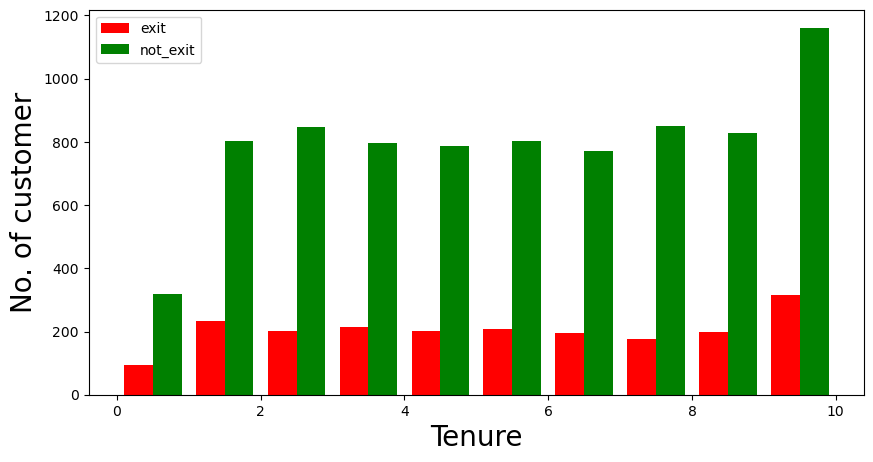

In [14]:
visualization(df_churn_exited,df_churn_not_exited, "Tenure")

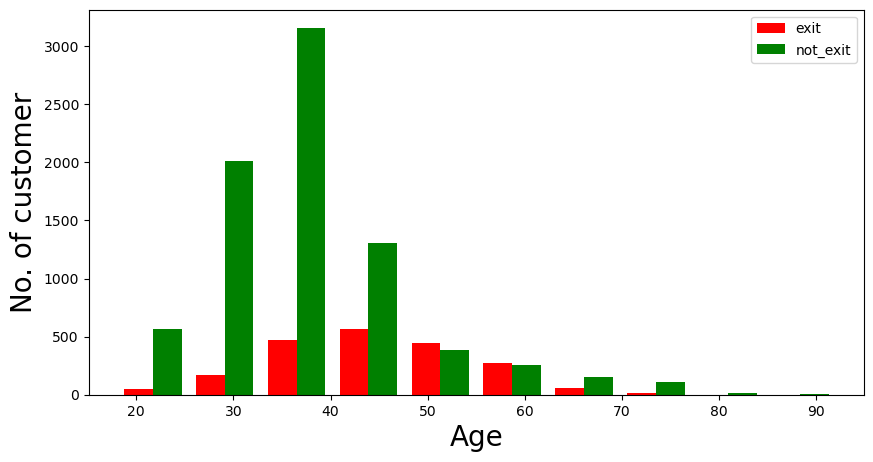

In [15]:
df_churn_exited2 = df[df['Exited'] == 1]['Age']
df_churn_not_exited2 = df[df['Exited'] == 0]['Age']
visualization(df_churn_exited2,df_churn_not_exited2, "Age")

In [16]:
X = df[['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited']]
states = pd.get_dummies(df['Geography'], drop_first = True)
gender = pd.get_dummies(df['Gender'], drop_first = True)

In [17]:
df = pd.concat([df,gender,states], axis = 1)

In [18]:
#Splitting the training and testing Dataset
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [19]:
X = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Male', 'Germany', 'Spain']]
y = df['Exited']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X, y,test_size= 0.30)

In [21]:
#normalizing the values with mean as 0 and Standard Deviation as 1
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
X_train

array([[ 0.67361842,  0.09809537, -0.69670751, ..., -1.11258782,
        -0.57669044, -0.57823004],
       [ 1.01302313,  0.66629364,  1.37888587, ..., -1.11258782,
        -0.57669044,  1.72941551],
       [ 0.29307376,  0.00339566, -0.00484305, ...,  0.89880545,
        -0.57669044,  1.72941551],
       ...,
       [ 0.41649365, -0.4701029 ,  1.03295364, ...,  0.89880545,
        -0.57669044, -0.57823004],
       [-0.29317073,  0.38219451,  1.03295364, ...,  0.89880545,
        -0.57669044, -0.57823004],
       [-1.07483005,  0.2874948 ,  0.68702141, ...,  0.89880545,
        -0.57669044,  1.72941551]])

In [23]:
X_test

array([[-0.5605805 ,  0.09809537, -0.00484305, ...,  0.89880545,
         1.73403256, -0.57823004],
       [ 1.55812765, -0.09130405, -1.38857198, ...,  0.89880545,
        -0.57669044, -0.57823004],
       [-0.15946585, -0.4701029 , -0.00484305, ..., -1.11258782,
        -0.57669044,  1.72941551],
       ...,
       [-0.28288574, -1.03830117, -0.35077528, ..., -1.11258782,
        -0.57669044, -0.57823004],
       [-1.05426006, -0.28070347, -1.04263975, ..., -1.11258782,
         1.73403256, -0.57823004],
       [-1.3525248 ,  0.00339566, -0.35077528, ...,  0.89880545,
        -0.57669044,  1.72941551]])

In [24]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(hidden_layer_sizes = (100, 100, 100), random_state = 0, max_iter = 100, activation = 'relu')
ann.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, random_state=0)

In [25]:
y_pred = ann.predict(X_test)

In [26]:
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

In [28]:
y_test.value_counts()

0    2363
1     637
Name: Exited, dtype: int64

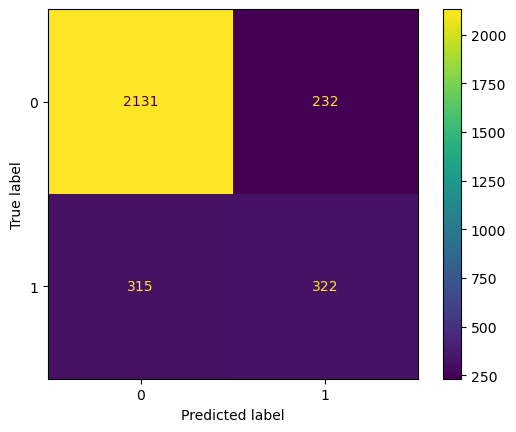

In [29]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [30]:
print(accuracy_score(y_test, y_pred))

0.8176666666666667


In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89      2363
           1       0.58      0.51      0.54       637

    accuracy                           0.82      3000
   macro avg       0.73      0.70      0.71      3000
weighted avg       0.81      0.82      0.81      3000



In [32]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [33]:
from imblearn.over_sampling import RandomOverSampler

In [34]:
ros = RandomOverSampler (random_state =0)

In [35]:
X_res,y_res = ros.fit_resample(X,y)

In [36]:
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [38]:
#Normalise
from sklearn.preprocessing import StandardScaler

In [39]:
Scaler = StandardScaler()

In [40]:
x_scaled = Scaler.fit_transform(X_res)

In [41]:
x_scaled

array([[-0.29877723,  0.08418894, -1.01840607, ..., -1.01799435,
        -0.6647702 , -0.54556873],
       [-0.4103938 , -0.01032629, -1.36135608, ..., -1.01799435,
        -0.6647702 ,  1.83294963],
       [-1.48597169,  0.08418894,  1.03929402, ..., -1.01799435,
        -0.6647702 , -0.54556873],
       ...,
       [-0.84671313,  1.02934128,  0.01044398, ...,  0.98232373,
         1.50427922, -0.54556873],
       [-0.96847667,  0.65128034, -0.67545605, ..., -1.01799435,
        -0.6647702 ,  1.83294963],
       [-1.5874413 ,  0.74579558,  1.03929402, ..., -1.01799435,
        -0.6647702 , -0.54556873]])

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train,X_test,y_train,y_test = train_test_split(x_scaled,y_res,random_state=0,test_size=0.25)

In [44]:
X_res.shape

(15926, 11)

In [45]:
from sklearn.neural_network import MLPClassifier

In [47]:
ann = MLPClassifier(hidden_layer_sizes =(100,100,100),random_state = 0,max_iter = 100,activation = "relu")

In [48]:
ann.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, random_state=0)

In [49]:
y_pred = ann.predict(X_test)

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report,accuracy_score

In [51]:
y_test.value_counts()

1    2001
0    1981
Name: Exited, dtype: int64

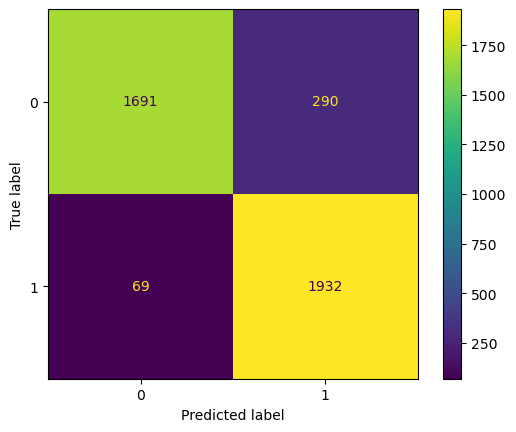

In [52]:
 ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [53]:
accuracy_score(y_test,y_pred)

0.9098442993470618

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      1981
           1       0.87      0.97      0.91      2001

    accuracy                           0.91      3982
   macro avg       0.92      0.91      0.91      3982
weighted avg       0.91      0.91      0.91      3982

